# Machine Learning Detection of Cardiovascular Disease
**By: Amal Alghamdi, Long Tran, Samuel Yoon, Ifeanyi Osuchukwu** 

In [4]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%autoreload 2
from urllib import request
import project_scripts
from project_scripts.one_hot_encode import *
from project_scripts.target_last_col import *
from project_scripts.get_data import *
from project_scripts.cross_validation import *
from project_scripts.prediction_cm import *
from project_scripts.bar_graph import *
from project_scripts.pca_variance import *
from project_scripts.pca_2d import *
from project_scripts.logistic_bound import *
from project_scripts.show_tree import *
from sklearn.feature_selection import RFECV
from sklearn import preprocessing

In [6]:
file = request.urlretrieve('https://www.cs.drexel.edu/~lht29/tmp/heart.csv', filename = "heart.csv")[0]
df = pd.read_csv(file)

In [4]:
df,converts = one_hot_encode(df)

In [5]:
data = target_last_col(df,"HeartDisease")

In [6]:
X,y,features = get_data(data)

<AxesSubplot:>

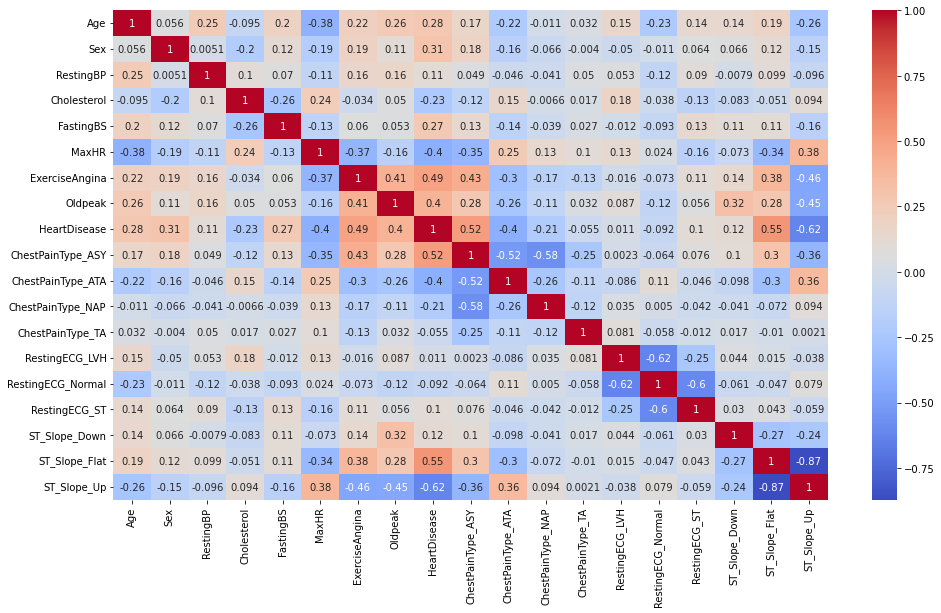

In [7]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")

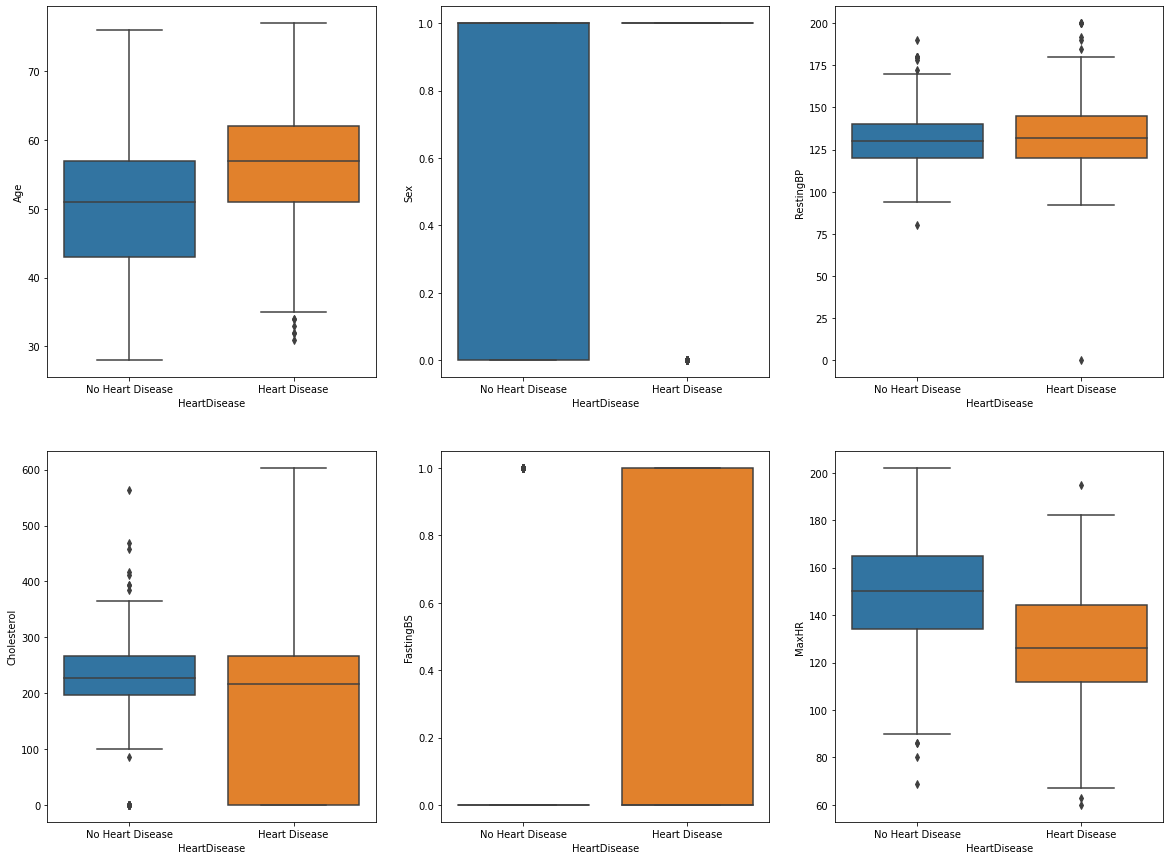

In [8]:
#checking for outliers
plt.figure(figsize=(20,15))

for i in range(6):
    plt.subplot(2,3, i+1)
    sns.boxplot(data=df, x='HeartDisease', y=df[df.columns[i]])
    plt.xticks([0, 1], ['No Heart Disease', "Heart Disease"])

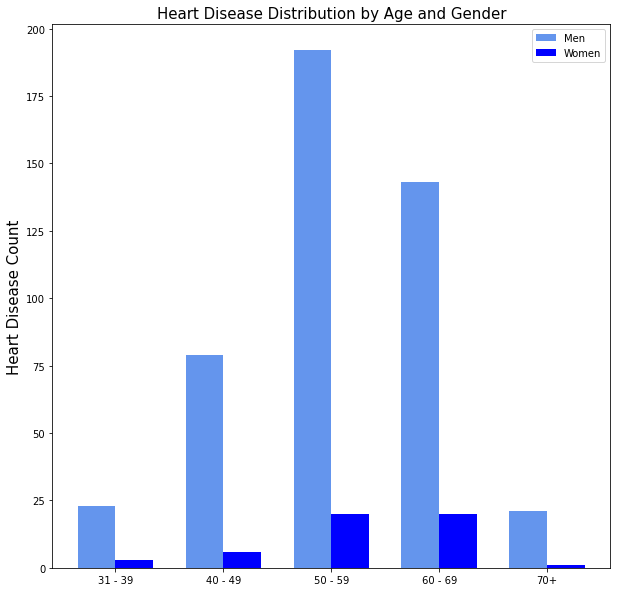

In [9]:
bar_graph_age_sex(data,y,t_value=1, target_label = "Heart Disease")

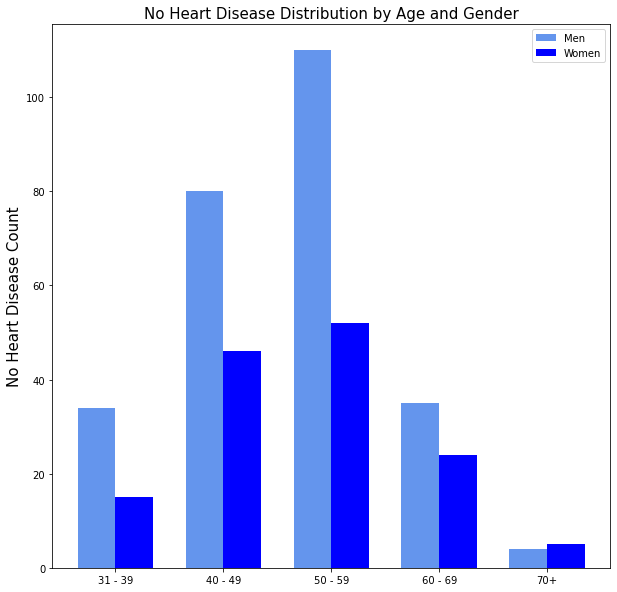

In [10]:
bar_graph_age_sex(data,y,t_value=0,target_label="No Heart Disease")

### PCA

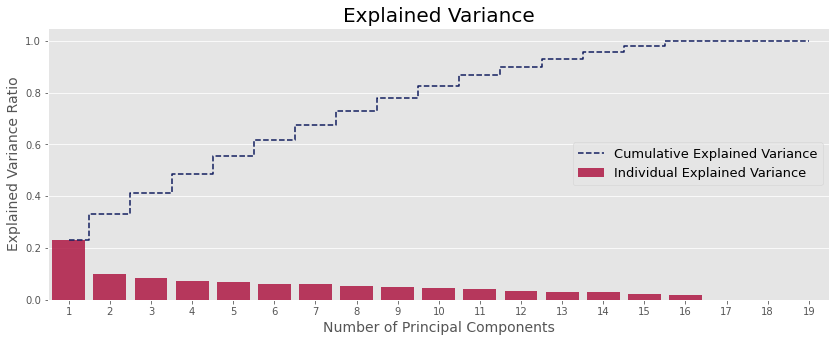

In [11]:
pca_variance(data)

Total Explained Variance of 2: 33.10%


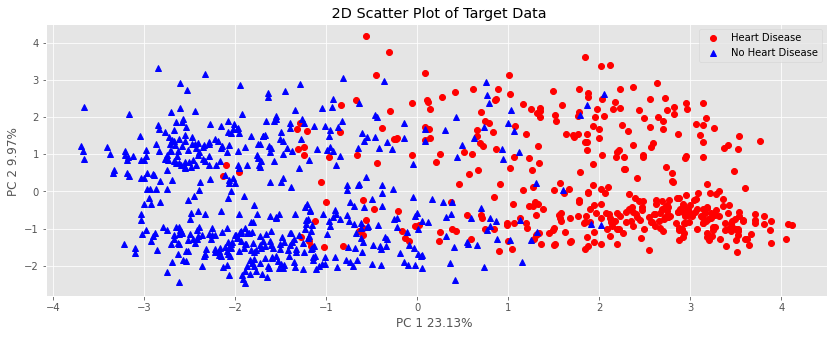

In [12]:
pca_2d(df,labels=['Heart Disease', 'No Heart Disease'],target ="HeartDisease",title_g=" 2D Scatter Plot of Target Data")

## Classification 

In [13]:
#standardize data
scaler=preprocessing.StandardScaler().fit(X)
X=scaler.transform(X)


### Logistic Regression Classification

In [14]:
cross_validation(LogisticRegression(solver='liblinear'),X,y,5)

---5--- fold cross-validation accuracy: 85.8% (+/- 2.0)


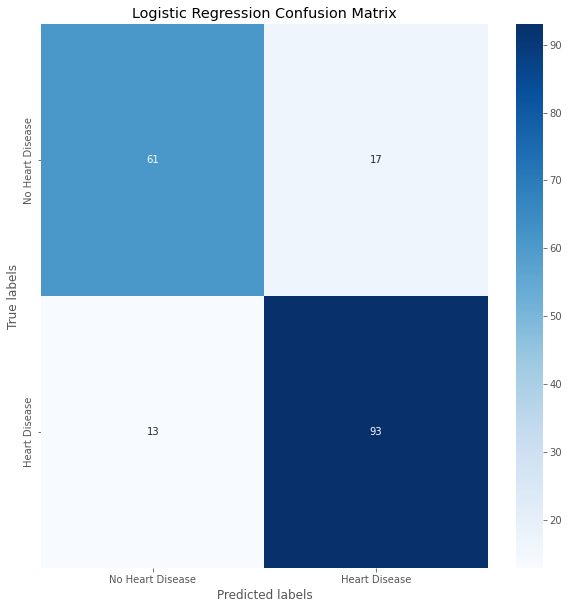

                  precision    recall  f1-score   support

No Heart Disease       0.82      0.78      0.80        78
   Heart Disease       0.85      0.88      0.86       106

        accuracy                           0.84       184
       macro avg       0.83      0.83      0.83       184
    weighted avg       0.84      0.84      0.84       184



In [15]:
predictions,score = prediction_cm(LogisticRegression(solver='liblinear'),X,y,["No Heart Disease","Heart Disease"],title="Logistic Regression Confusion Matrix")

#### Logistic Regression Decision

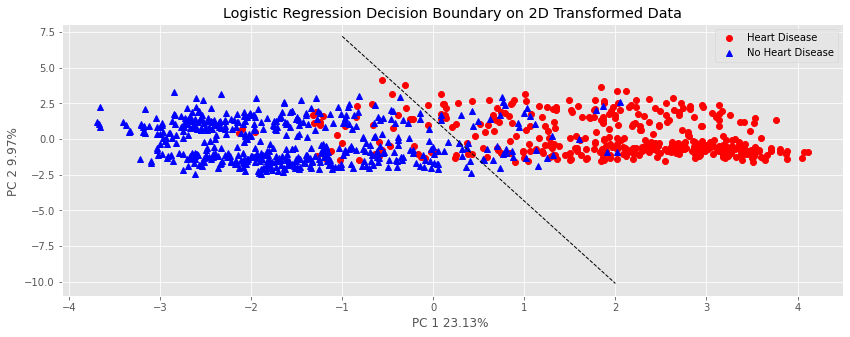

In [16]:
logistic_bound(data,y,"Logistic Regression Decision Boundary on 2D Transformed Data")


### Descision Tree Classifier 

In [17]:
cross_validation(tree.DecisionTreeClassifier(),X,y,5)

---5--- fold cross-validation accuracy: 78.9% (+/- 3.1)


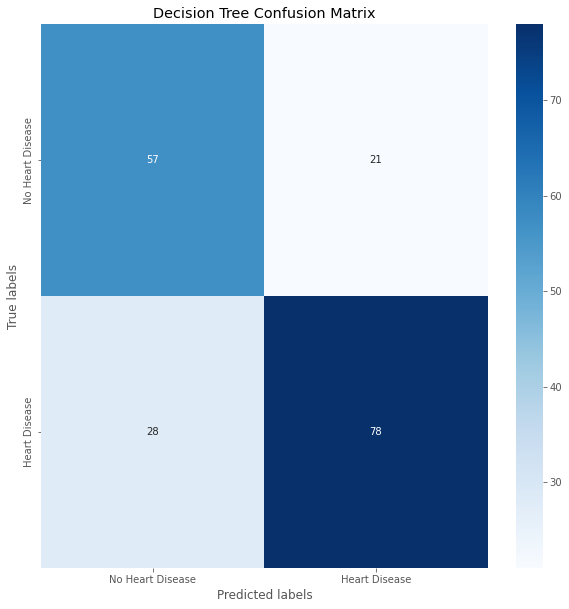

                  precision    recall  f1-score   support

No Heart Disease       0.67      0.73      0.70        78
   Heart Disease       0.79      0.74      0.76       106

        accuracy                           0.73       184
       macro avg       0.73      0.73      0.73       184
    weighted avg       0.74      0.73      0.73       184



In [18]:
predictions_2,score_2= prediction_cm(tree.DecisionTreeClassifier(),X,y,["No Heart Disease","Heart Disease"],title="Decision Tree Confusion Matrix")

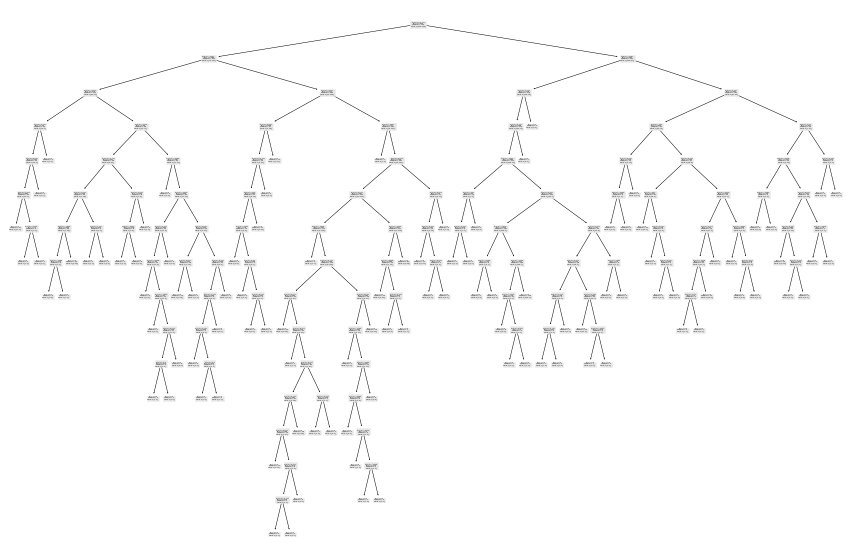

In [19]:
show_tree(X,y)

## Feature Selection 

In [20]:
classifier=LogisticRegression(solver="liblinear",max_iter=5000)
selector = RFECV(classifier,cv=4,scoring='accuracy')
selector.fit(X, y)

print('Selected Features (%d):' % (selector.n_features_))
print(np.array(features)[selector.get_support()])
X_fs=selector.transform(X)

Selected Features (9):
['Age' 'Sex' 'Cholesterol' 'FastingBS' 'ExerciseAngina' 'Oldpeak'
 'ChestPainType_ASY' 'ST_Slope_Flat' 'ST_Slope_Up']


### Logistic Regression Classification

In [21]:
cross_validation(LogisticRegression(solver='liblinear'),X_fs,y,5)

---5--- fold cross-validation accuracy: 86.5% (+/- 2.5)


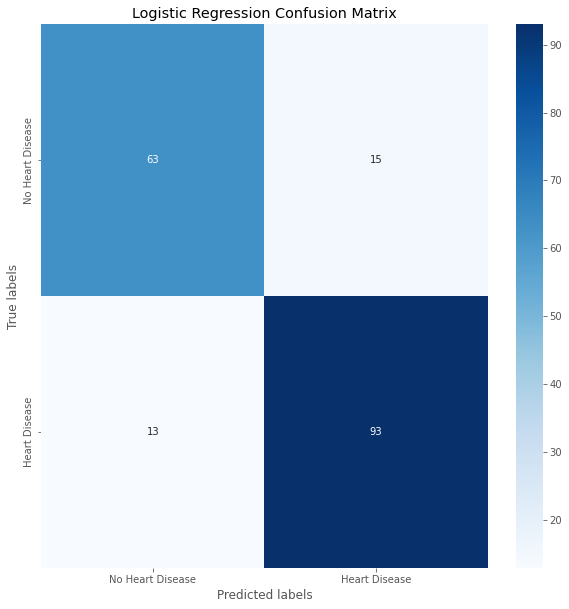

                  precision    recall  f1-score   support

No Heart Disease       0.83      0.81      0.82        78
   Heart Disease       0.86      0.88      0.87       106

        accuracy                           0.85       184
       macro avg       0.85      0.84      0.84       184
    weighted avg       0.85      0.85      0.85       184



In [22]:
predictions_3,score_3 = prediction_cm(LogisticRegression(solver='liblinear'),X_fs,y,["No Heart Disease","Heart Disease"],title="Logistic Regression Confusion Matrix")

### Descision Tree Classifier 

In [23]:
cross_validation(tree.DecisionTreeClassifier(),X_fs,y,5)

---5--- fold cross-validation accuracy: 78.5% (+/- 3.1)


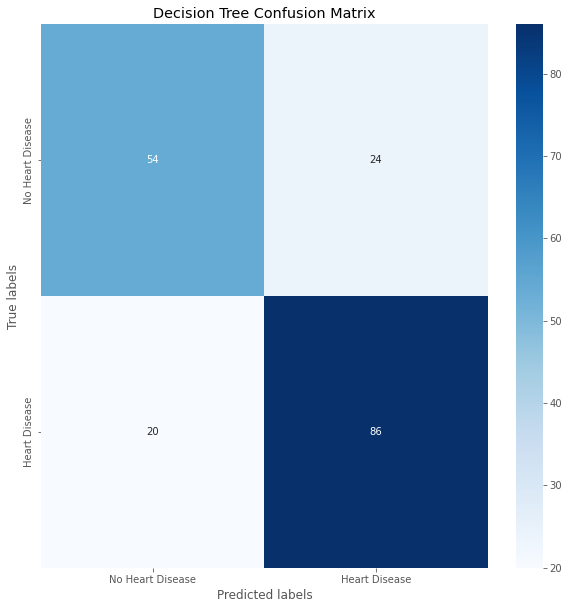

                  precision    recall  f1-score   support

No Heart Disease       0.73      0.69      0.71        78
   Heart Disease       0.78      0.81      0.80       106

        accuracy                           0.76       184
       macro avg       0.76      0.75      0.75       184
    weighted avg       0.76      0.76      0.76       184



In [24]:
predictions_4,score_4 = prediction_cm(tree.DecisionTreeClassifier(),X_fs,y,["No Heart Disease","Heart Disease"],title="Decision Tree Confusion Matrix")

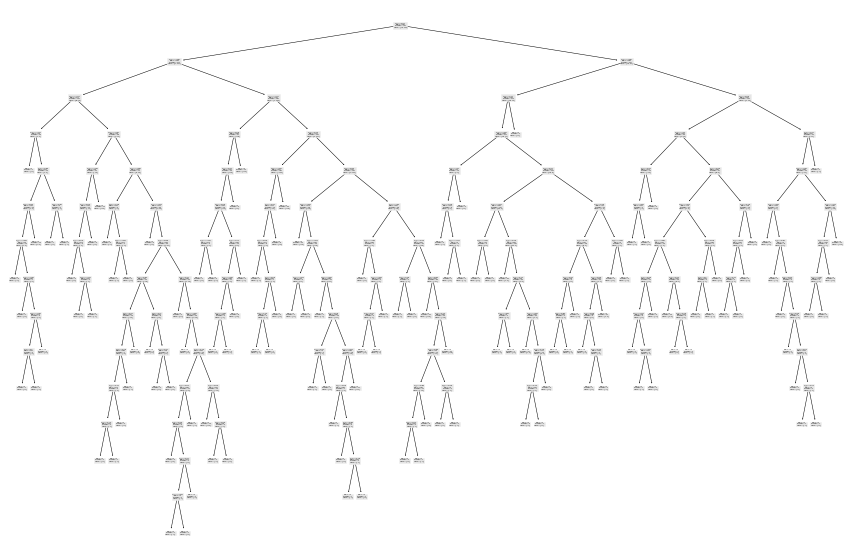

In [25]:
show_tree(X_fs,y)